

# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
>
tmdb-movies: 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue
The data set consists of 18 columns and they are:
id, imdb_id	popularity,	budget,	revenue	original_title,	cast, homepage,	director,	tagline,	keywords,	overview,	runtime,	genres,	production_companies,	release_date,	vote_count,	vote_average,	release_year,	budget_adj,	revenue_adj.


### Question(s) for Analysis
##### the questions we are trying to answer is
>1- Do the profits of the film industry increase regularly or do you suffer from some hiccups, and when they reach their best profits and What decade were the most films produced?
##### 
>2- Is there a certain time of year when movie revenue swells or are all times equal?
##### 
>3- Does a higher budget necessarily mean a higher profit rate or not??
##### 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling
> we start with reading our CSV file that we are going to investigate

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Cleaning
##### I removed the Unnecessary columns which will no be useful in our analysis and they are 
id,  imdb_id,  keywords,  original_title,  cast,  homepage,  director,  tagline,  overview,  runtime,  genres,  production_companies,  vote_count,  budget_adj,  revenue_adj
 

In [3]:
unnecessary_columns = ['id', 'imdb_id','keywords', 'original_title', 'cast', 'homepage', 'director', 'tagline',
         'overview', 'runtime', 'genres', 'production_companies', 'vote_count', 'budget_adj', 'revenue_adj']
def drop_column(array):
    df.drop(array, axis = 1, inplace = True)
drop_column(unnecessary_columns)
df.head()

,popularity,budget,revenue,release_date,vote_average,release_year
0,32.985763,150000000,1513528810,6/9/15,6.5,2015
1,28.419936,150000000,378436354,5/13/15,7.1,2015
2,13.112507,110000000,295238201,3/18/15,6.3,2015
3,11.173104,200000000,2068178225,12/15/15,7.5,2015
4,9.335014,190000000,1506249360,4/1/15,7.3,2015


### Exploring Data
> to see if there is anything we need to do 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10866 non-null  float64
 1   budget        10866 non-null  int64  
 2   revenue       10866 non-null  int64  
 3   release_date  10866 non-null  object 
 4   vote_average  10866 non-null  float64
 5   release_year  10866 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 509.5+ KB


In [5]:
df.describe()

,popularity,budget,revenue,vote_average,release_year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,5.974922,2001.322658
std,1.000185,3.091321e+07,1.170035e+08,0.935142,12.812941
min,0.000065,0.000000e+00,0.000000e+00,1.500000,1960.000000
25%,0.207583,0.000000e+00,0.000000e+00,5.400000,1995.000000
50%,0.383856,0.000000e+00,0.000000e+00,6.000000,2006.000000
75%,0.713817,1.500000e+07,2.400000e+07,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,9.200000,2015.000000


In [6]:
df.shape

(10866, 6)

>it seems like all the data is clean and no missing values and all the data types is correct 
## 
>i will convert release date to timedate to make it easy to deal with in our alanysis

In [7]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   popularity    10866 non-null  float64       
 1   budget        10866 non-null  int64         
 2   revenue       10866 non-null  int64         
 3   release_date  10866 non-null  datetime64[ns]
 4   vote_average  10866 non-null  float64       
 5   release_year  10866 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 509.5 KB


> Making new clomun to calculate profit percent

In [8]:
df['profit_percent'] = ((df['revenue'] - df['budget']) / df['budget']) * 100
df['profit_percent'].head()

0    909.019207
1    152.290903
2    168.398365
3    934.089113
4    692.762821
Name: profit_percent, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis

>Now that we've trimmed and cleaned our data, we're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that we posed in the Introduction section.

### Research Question 1 
#### Do the profits of the film industry increase regularly or do you suffer from some hiccups, and when they reach their best profits and What decade were the most movies produced? 

> we will start by visualise the relationship between Release year and other elements like Revenue and Profit percent

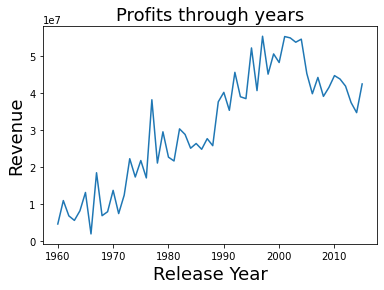

In [40]:
df.groupby('release_year')['revenue'].mean().plot(kind = 'line')
plt.xlabel('Release Year', fontsize = 18)
plt.ylabel('Revenue', fontsize = 18)
plt.title('Profits through years', fontsize = 18);

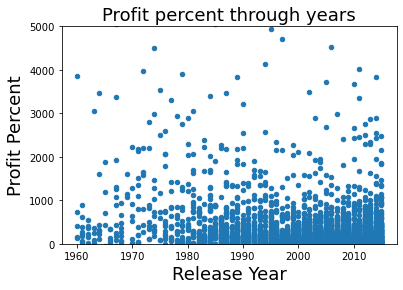

In [41]:
ax1 = plt.subplot(111)
df.plot(x = 'release_year', y = 'profit_percent', ax = ax1, kind = 'scatter')
ax1.set_ylim(0,5000)
plt.xlabel('Release Year', fontsize = 18)
plt.ylabel('Profit Percent', fontsize = 18);
plt.title('Profit percent through years', fontsize = 18);

> Then I will visuallise the number of movies produced through decades

>First I am going to make a new column to get dacade 

In [25]:
decades = ["1960's", "1970's", "1980's", "1990's", "2000's", "2010's"]
years = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
df['decade'] = pd.cut(df['release_year'],bins = years, labels = decades)
df.head()

,popularity,budget,revenue,release_date,vote_average,release_year,profit_percent,decade
0,32.985763,150000000,1513528810,2015-06-09,6.5,2015,909.019207,2010's
1,28.419936,150000000,378436354,2015-05-13,7.1,2015,152.290903,2010's
2,13.112507,110000000,295238201,2015-03-18,6.3,2015,168.398365,2010's
3,11.173104,200000000,2068178225,2015-12-15,7.5,2015,934.089113,2010's
4,9.335014,190000000,1506249360,2015-04-01,7.3,2015,692.762821,2010's


> then the visualization step

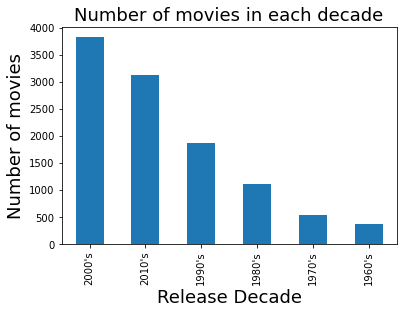

In [39]:
df['decade'].value_counts().plot(kind = 'bar')
plt.xlabel('Release Decade', fontsize = 18)
plt.ylabel('Number of movies', fontsize = 18)
plt.title('Number of movies in each decade', fontsize = 18);

>It seems like the profits of the film industry doesn't increase regularly and do suffer from some hiccups, it reached it's best profits between 1995 and 2005 then started to Then the profits started to fall.
the decade were the most movies produced was 2000's with more than 3500 movie

### Research Question 2  
##### Is there a certain time of year when movie revenue swells or are all times equal?

>First I am going to make a column for the release month

In [44]:
df['release_month'] = df['release_date'].dt.month
df.head()

,popularity,budget,revenue,release_date,vote_average,release_year,profit_percent,decade,release_month
0,32.985763,150000000,1513528810,2015-06-09,6.5,2015,909.019207,2010's,6
1,28.419936,150000000,378436354,2015-05-13,7.1,2015,152.290903,2010's,5
2,13.112507,110000000,295238201,2015-03-18,6.3,2015,168.398365,2010's,3
3,11.173104,200000000,2068178225,2015-12-15,7.5,2015,934.089113,2010's,12
4,9.335014,190000000,1506249360,2015-04-01,7.3,2015,692.762821,2010's,4


>Then I am going to visualise the relation between Release Month and other elements like Revenue and Vote average

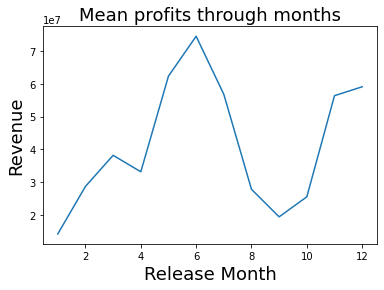

In [45]:
df.groupby('release_month')['revenue'].mean().plot(kind = 'line')
plt.xlabel('Release Month', fontsize = 18)
plt.ylabel('Revenue', fontsize = 18);
plt.title('Mean profits through months', fontsize = 18);

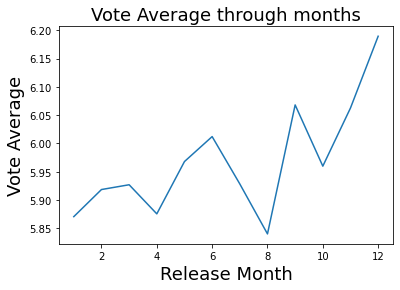

In [46]:
df.groupby('release_month')['vote_average'].mean().plot(kind = 'line')
plt.xlabel('Release Month', fontsize = 18)
plt.ylabel('Vote Average', fontsize = 18);
plt.title('Vote Average through months', fontsize = 18);

> It seems like not all months are the same and the best months to release a movie is 6 and 12 as they have the heights revenue and vote avergae

### Research Question 3  
###### Does a higher budget necessarily mean a higher profit rate or not?
> I am going to visualise the relationship between Budget and other elements like Profit percent and Revenue

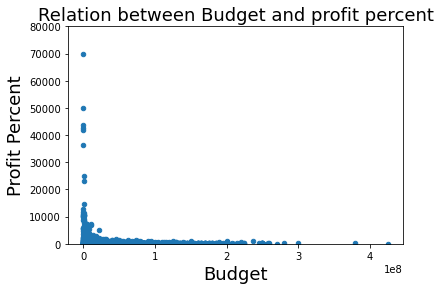

In [47]:
ax2 = plt.subplot(111)
df.plot(x = 'budget', y = 'profit_percent',ax=ax2, kind = 'scatter')

ax2.set_ylim(0,80000)
plt.xlabel('Budget', fontsize = 18)
plt.ylabel('Profit Percent', fontsize = 18);
plt.title('Relation between Budget and profit percent', fontsize = 18);

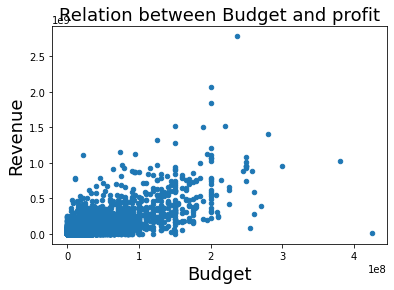

In [48]:
df.plot(x = 'budget', y = 'revenue', kind = 'scatter')
plt.xlabel('Budget', fontsize = 18)
plt.ylabel('Revenue', fontsize = 18);
plt.title('Relation between Budget and profit', fontsize = 18);

> Looks like raising the budget will raise the revenue but isn't necessary rising the profit percent.

## Limitations 
<p>Certainly, a sample of 10,000 films is not sufficient to confirm the validity of this analysis, but it is only based on the available evidence</p>

<p>There were a lot of options for analyzing this data and a lot of aspects of the analysis such as the Cast, the production company and the Genres of the movie that directly affect the statistics of the movie, but I mostly focused on analyzing the numerical data</p>
<p>This analysis can be done better than I have done to the best of my knowledge</p>
<p> I hope that this analysis was sufficient to present the aspects that were analyzed</p>


<a id='conclusions'></a>
## Conclusions
> In the end, we can make some points.
###### 
<p>O The profits of the film industry doesn't increase regularly and do suffer from some hiccups </p>
<p>O Movies industry reached it's best profits between 1995 and 2005 then started to Then the profits started to fall </p>
<p>O The year were the most movies produced was 2014 with 700 movie </p>
<p>O Not all months are the same and the best months to release a movie is 6 and 12 as they have the heights revenue and vote avergae </p>
<p>O raising the budget will raise the revenue but isn't necessary rising the profit percent. </p>

